In [1]:
# WE NEED TO RUN THAT SCRIPT 12 HOURS AFTER DEADLINE
HOLDOUT = 1  # number of hours to skip before first prediction
TIMEZONE = 3

plt.style.use('bmh')

### Check predictions

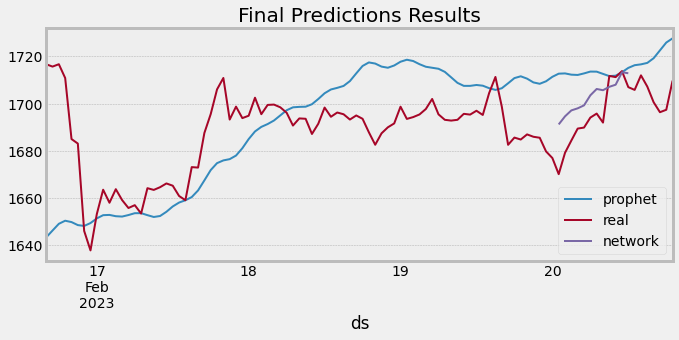

In [2]:
# get the data
url = 'https://cexa.oceanprotocol.io/ohlc?exchange=binance&pair=ETH/USDT&period=1h'
df = pd.read_json(url)
df.columns = ['dt1','open','high','low','close','volume']
# convert to UTC+0 
df['dt1'] = [dt.fromtimestamp(x/1000) - relativedelta(hours=TIMEZONE) for x in df.dt1]
df.set_index('dt1', inplace = True)

df_preds = pd.read_pickle('output/df_preds.pkl')
df_preds['real'] = df['close']

# plotting
_ = df_preds[-100:].plot(figsize = (10,4), title = 'Final Predictions Results')

In [3]:
# evaluation metrics
def ts_metrics(y_true, y_pred):
    return {
        'mae': metrics.mean_absolute_error(y_true, y_pred),
        'mape': np.mean(np.abs((y_true - y_pred) / y_true)),
        'nmse':  np.sum((y_true - y_pred)**2) / np.sum((y_true)**2),
    }

last_value = 1682.65
filt = ~df_preds['network'].isnull()
n = 12

# results
df_out = pd.DataFrame()
df_out['last_value'] = ts_metrics(df_preds[filt]['real'][:n], [last_value]*n)
df_out['prophet'] = ts_metrics(df_preds[filt]['real'][:n], df_preds[filt]['prophet'][:n])
df_out['network'] = ts_metrics(df_preds[filt]['real'][:n], df_preds[filt]['network'][:n])
df_out = -df_out
df_out.T.style.background_gradient(cmap='RdYlGn', axis = 0)

,mae,mape,nmse
last_value,-14.893333,-0.008748,-0.000113
prophet,-18.072375,-0.010723,-0.000173
network,-9.580485,-0.005677,-0.000042
